<a href="https://colab.research.google.com/github/blaw5/dlwpt-code/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 Part 1

In [1]:
import numpy as np 
import pandas as pd 
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
# Data Visualisation 
import matplotlib.pyplot as plt 

In [2]:
housing = pd.DataFrame(pd.read_csv
                  ("../content/drive/MyDrive/ColabNotebooks/data/Housing.csv"))

In [3]:
vars = ['area','bedrooms','bathrooms','stories','parking','price']
data = housing[vars]
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
scaler = MinMaxScaler()
newSet = scaler.fit_transform(data)

t_u = torch.from_numpy(newSet[0:545, 0:5]).float()
t_c = torch.from_numpy(newSet[0:545, 5:6]).float()

In [4]:
n_samples = t_u.shape[0]
nval = int(0.2 * n_samples) #80% Training 20% Vali
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-nval]
val_indices = shuffled_indices[-nval:]

In [5]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [6]:
linear_model = nn.Sequential(
nn.Linear(5, 8),
nn.Tanh(),
nn.Linear(8, 1))

In [7]:
optimizer = optim.SGD(
    linear_model.parameters(),
    lr = 1e-2)

In [8]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
t_c_train, t_c_val):
  t_predicted = []
  for epoch in range(1, n_epochs + 1):
    t_p_train = model(t_u_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    t_p_val = model(t_u_val)

    loss_val = loss_fn(t_p_val, t_c_val)
    t_predicted.append(loss_val.item())
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if epoch == 1 or epoch % 20 == 0:
      print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
      f" Validation loss {loss_val.item():.4f}")
  import matplotlib.pyplot as plt
 
  #print(np.asarray(t_predicted))
  fig = plt.figure(dpi = 100)
  step = np.linspace(0,n_epochs,n_epochs)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(step,np.array(t_predicted))
  #plt.plot(t_c_train + t_predicted, 'c-')
  #plt.plot(t_c_train, 'o')

Epoch 1, Training loss 0.3947, Validation loss 0.3932
Epoch 20, Training loss 0.0948, Validation loss 0.0965
Epoch 40, Training loss 0.0412, Validation loss 0.0442
Epoch 60, Training loss 0.0323, Validation loss 0.0359
Epoch 80, Training loss 0.0302, Validation loss 0.0340
Epoch 100, Training loss 0.0291, Validation loss 0.0331
Epoch 120, Training loss 0.0283, Validation loss 0.0323
Epoch 140, Training loss 0.0275, Validation loss 0.0316
Epoch 160, Training loss 0.0268, Validation loss 0.0309
Epoch 180, Training loss 0.0261, Validation loss 0.0303
Epoch 200, Training loss 0.0255, Validation loss 0.0297


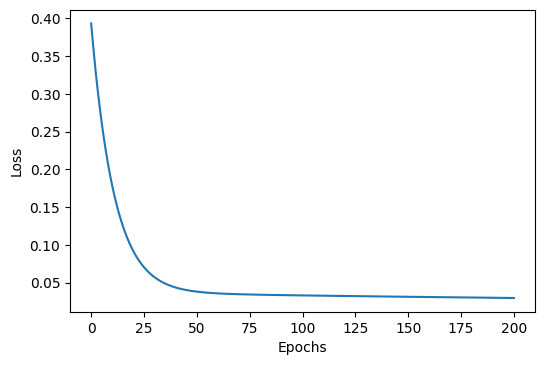

In [9]:
training_loop(
n_epochs = 200,
optimizer = optimizer,
model = linear_model,
loss_fn = nn.MSELoss(),
t_u_train = train_t_u,
t_u_val = val_t_u,
t_c_train = train_t_c,
t_c_val = val_t_c)

Problem 1 Part 2


In [10]:
linear_model_2 = nn.Sequential(
nn.Linear(5, 8),
nn.Tanh(),
nn.Linear(8, 4),
nn.Tanh(),
nn.Linear(4, 2),
nn.Tanh(),
nn.Linear(2, 1))

In [11]:
optimizer_2 = optim.SGD(
    linear_model_2.parameters(),
    lr = 1e-2)

Epoch 1, Training loss 0.0395, Validation loss 0.0448
Epoch 20, Training loss 0.0285, Validation loss 0.0334
Epoch 40, Training loss 0.0257, Validation loss 0.0305
Epoch 60, Training loss 0.0251, Validation loss 0.0297
Epoch 80, Training loss 0.0249, Validation loss 0.0295
Epoch 100, Training loss 0.0248, Validation loss 0.0294
Epoch 120, Training loss 0.0247, Validation loss 0.0293
Epoch 140, Training loss 0.0246, Validation loss 0.0292
Epoch 160, Training loss 0.0245, Validation loss 0.0292
Epoch 180, Training loss 0.0245, Validation loss 0.0291
Epoch 200, Training loss 0.0244, Validation loss 0.0290


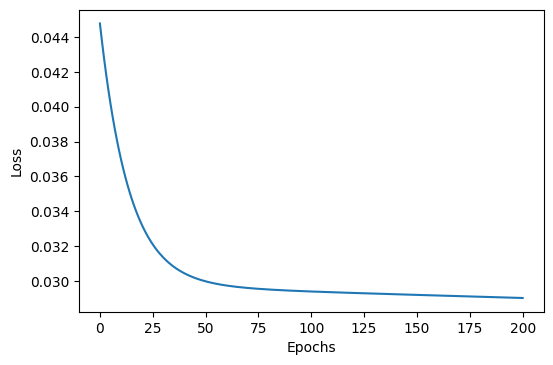

In [12]:
training_loop(
n_epochs = 200,
optimizer = optimizer_2,
model = linear_model_2,
loss_fn = nn.MSELoss(),
t_u_train = train_t_u,
t_u_val = val_t_u,
t_c_train = train_t_c,
t_c_val = val_t_c)

Problem 2 Part 1



In [33]:
from torchvision import datasets
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
data_path = "../content/drive/MyDrive/ColabNotebooks/data/hw3/"
cifar10_origin = datasets.CIFAR10(data_path, train = True, download = True)
cifar10_val_origin = datasets.CIFAR10(data_path, train = False, download = True)

Files already downloaded and verified
Files already downloaded and verified


In [34]:
tensor_cifar10 = datasets.CIFAR10(data_path, train = True, download = False, 
                                  transform=transforms.ToTensor())
img_t, _ = tensor_cifar10[99]
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10],dim=3)
print(imgs.view(3,-1).mean(dim=1))
print(imgs.view(3,-1).std(dim=1))

tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


In [35]:
tensor_cifar10_val = datasets.CIFAR10(data_path, train = False, 
                                      download = False, 
                                      transform=transforms.ToTensor())
img_t_v = tensor_cifar10_val[99]
imgs_v = torch.stack([img_t_v for img_t_v, _ in tensor_cifar10_val],dim=3)
print(imgs_v.view(3,-1).mean(dim=1))
print(imgs_v.view(3,-1).std(dim=1))

tensor([0.4942, 0.4851, 0.4504])
tensor([0.2467, 0.2429, 0.2616])


In [36]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download= False,
    transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])
)

In [37]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download= False,
    transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4942, 0.4851, 0.4504), (0.2467, 0.2429, 0.2616))])
)

In [ ]:
#label_map = {0:0, 2:1}
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 
#               'horse', 'ship', 'truck']
#cifar10 = [(img, label_map[label])]
#            for img, label in cifar10_origin
#            if label in [0, 2]
#cifar10_val = [(img, label_map[label])
#              for img, label in cifar10_val_origin
 #             if label in [0,2]]

In [38]:
train_loader = torch.utils.data.DataLoader(transformed_cifar10, batch_size = 64, 
                                           shuffle = True)
n_out = 10 #All 10 classes

model = nn.Sequential(
    nn.Linear(
        3072, #in features
        512, #hidden 
    ),
    nn.Tanh(),
    nn.Linear(
        512, #hidden
        n_out,
    ),
    nn.LogSoftmax(dim=1)
)

In [39]:
learning_rate = 1e-2
optimizer_ = optim.SGD(model.parameters(), lr = learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 300

Epoch: 0, Loss: 2.120220
Epoch: 1, Loss: 1.478003
Epoch: 2, Loss: 1.213004
Epoch: 3, Loss: 1.676496
Epoch: 4, Loss: 1.330921
Epoch: 5, Loss: 1.663765
Epoch: 6, Loss: 1.424093
Epoch: 7, Loss: 1.155605
Epoch: 8, Loss: 1.877554
Epoch: 9, Loss: 1.441633
Epoch: 10, Loss: 1.612073
Epoch: 11, Loss: 1.212984
Epoch: 12, Loss: 1.531724
Epoch: 13, Loss: 1.234742
Epoch: 14, Loss: 1.099078
Epoch: 15, Loss: 1.369407
Epoch: 16, Loss: 1.148227
Epoch: 17, Loss: 0.878949
Epoch: 18, Loss: 1.303436
Epoch: 19, Loss: 1.545940
Epoch: 20, Loss: 0.759748
Epoch: 21, Loss: 0.841729
Epoch: 22, Loss: 1.691596
Epoch: 23, Loss: 0.775674
Epoch: 24, Loss: 0.652692
Epoch: 25, Loss: 0.687855
Epoch: 26, Loss: 0.962165
Epoch: 27, Loss: 0.597424
Epoch: 28, Loss: 1.001883
Epoch: 29, Loss: 0.613220
Epoch: 30, Loss: 0.770170
Epoch: 31, Loss: 0.821476
Epoch: 32, Loss: 0.454166
Epoch: 33, Loss: 0.711074
Epoch: 34, Loss: 0.789342
Epoch: 35, Loss: 0.527161
Epoch: 36, Loss: 0.312183
Epoch: 37, Loss: 0.476491
Epoch: 38, Loss: 0.611

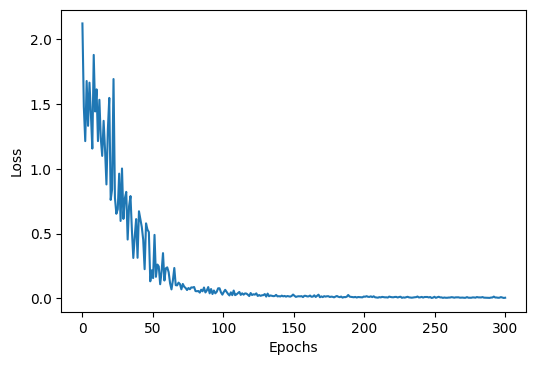

In [40]:
t_predicted = []
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
      batch_size = imgs.shape[0]
      outputs = model(imgs.view(batch_size, -1))
      loss = loss_fn(outputs, labels)
      optimizer_.zero_grad()
      loss.backward()
      optimizer_.step()
    t_predicted.append(loss.item())
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
fig = plt.figure(dpi = 100)
step = np.linspace(0,n_epochs,n_epochs)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(step,np.array(t_predicted))

In [24]:
val_loader = torch.utils.data.DataLoader(transformed_cifar10_val, batch_size=64,
shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs_v, labels in val_loader:
    batch_size = imgs_v.shape[0]
    outputs = model(imgs_v.view(batch_size, -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

Accuracy: %f 0.4681


Problem 2 Part 2

In [25]:
train_loader = torch.utils.data.DataLoader(transformed_cifar10, batch_size = 64, 
                                           shuffle = True)
n_out = 10 #All 10 classes

model_v2 = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 128),
    nn.Tanh(),
    nn.Linear(128,n_out),
    nn.LogSoftmax(dim=1)
)

In [26]:
learning_rate = 1e-2
optimizer_v2 = optim.SGD(model_v2.parameters(), lr = learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 300

Epoch: 0, Loss: 1.657018
Epoch: 1, Loss: 1.458959
Epoch: 2, Loss: 1.979859
Epoch: 3, Loss: 1.577101
Epoch: 4, Loss: 1.441849
Epoch: 5, Loss: 1.233595
Epoch: 6, Loss: 1.686482
Epoch: 7, Loss: 1.209739
Epoch: 8, Loss: 1.628567
Epoch: 9, Loss: 1.185835
Epoch: 10, Loss: 1.143459
Epoch: 11, Loss: 1.164252
Epoch: 12, Loss: 0.723094
Epoch: 13, Loss: 1.143742
Epoch: 14, Loss: 0.883286
Epoch: 15, Loss: 0.916958
Epoch: 16, Loss: 0.815777
Epoch: 17, Loss: 1.154745
Epoch: 18, Loss: 0.921759
Epoch: 19, Loss: 0.806028
Epoch: 20, Loss: 1.699053
Epoch: 21, Loss: 0.501434
Epoch: 22, Loss: 0.902372
Epoch: 23, Loss: 1.529405
Epoch: 24, Loss: 0.686166
Epoch: 25, Loss: 0.473489
Epoch: 26, Loss: 0.481589
Epoch: 27, Loss: 0.196315
Epoch: 28, Loss: 0.710210
Epoch: 29, Loss: 0.376876
Epoch: 30, Loss: 0.899716
Epoch: 31, Loss: 0.832313
Epoch: 32, Loss: 0.544064
Epoch: 33, Loss: 0.413908
Epoch: 34, Loss: 0.424580
Epoch: 35, Loss: 0.346181
Epoch: 36, Loss: 0.265819
Epoch: 37, Loss: 0.208573
Epoch: 38, Loss: 0.085

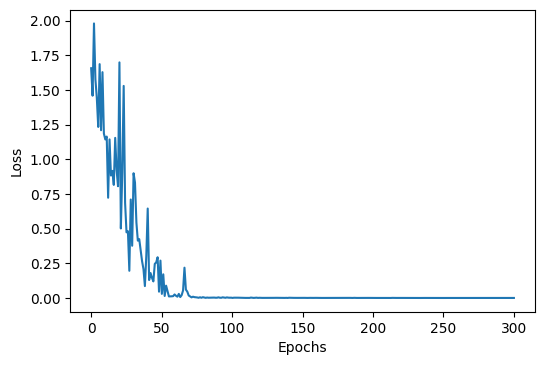

In [27]:
t_predicted = []

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
      batch_size = imgs.shape[0]
      outputs = model_v2(imgs.view(batch_size, -1))
      loss = loss_fn(outputs, labels)
      optimizer_v2.zero_grad()
      loss.backward()
      optimizer_v2.step()
    t_predicted.append(loss.item())
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
fig = plt.figure(dpi = 100)
step = np.linspace(0,n_epochs,n_epochs)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(step,np.array(t_predicted))

In [28]:
val_loader = torch.utils.data.DataLoader(transformed_cifar10_val, batch_size=64,
shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs_v, labels in val_loader:
    batch_size = imgs_v.shape[0]
    outputs = model_v2(imgs_v.view(batch_size, -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

Accuracy: %f 0.456
